# Regressors Template

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import metrics

**Loading the dataset**

In [2]:
df = pd.read_csv('Regressors.csv')

In [3]:
df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


## Setting up the data

**Train Test Split**

In [4]:
X = df.drop('X', axis=1).values
y = df["Y"].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training models and Evaluating Model Performance

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
regressors = [
    svm.SVR(kernel='linear'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.RidgeCV(),
    linear_model.ElasticNet(),
    linear_model.ElasticNetCV(),
    linear_model.Lasso(),
    linear_model.LassoCV(),
    linear_model.HuberRegressor(),
    linear_model.PoissonRegressor(),
    linear_model.TweedieRegressor(),
    linear_model.GammaRegressor()    
]
regression = pd.DataFrame(columns=['Regressor', 'R²'], index=None)
for item in regressors:
    print(item)
    reg = item
    reg.fit(X_train, y_train)
    print("Coef:", reg.coef_)
    predictions = reg.predict(X_test)
    regression = pd.concat([pd.DataFrame([[item, metrics.r2_score(y_test, predictions)]], columns=regression.columns, index=None), regression], ignore_index=True)
    print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R²: ', metrics.r2_score(y_test, predictions))
    print('\n')

SVR(kernel='linear')
Coef: [[57.50065141]]
MAE:  0.06100645448002902
RMSE:  0.06878777377729725
R²:  0.9999986132482239


SGDRegressor()
Coef: [57.55653788]
MAE:  0.013612407590012986
RMSE:  0.016804522852765458
R²:  0.9999999172384543


BayesianRidge()
Coef: [57.56837883]
MAE:  5.505373934511226e-13
RMSE:  6.208785286568838e-13
R²:  1.0


ARDRegression()
Coef: [57.56837883]
MAE:  5.447346277757485e-13
RMSE:  6.138767405202209e-13
R²:  1.0


PassiveAggressiveRegressor()
Coef: [57.57490111]
MAE:  0.051604842982652374
RMSE:  0.052027472008600986
R²:  0.9999992066922982


TheilSenRegressor()
Coef: [57.56837883]
MAE:  6.645545758132698e-09
RMSE:  7.653454472441259e-09
R²:  1.0


LinearRegression()
Coef: [57.56837883]
MAE:  6.069219201284189e-16
RMSE:  1.7502599374402256e-15
R²:  1.0


Ridge()
Coef: [57.32950589]
MAE:  0.21511756571942572
RMSE:  0.24258058496462964
R²:  0.9999827540032432


RidgeCV()
Coef: [57.544402]
MAE:  0.02159239207183566
RMSE:  0.02434898834065132
R²:  0.9999998262446

In [8]:
regressors = [
    svm.SVR(kernel='rbf'),
    svm.SVR(kernel='poly'),
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    ensemble.RandomForestRegressor(n_estimators=300),
    ensemble.GradientBoostingRegressor(n_estimators=300),
    ensemble.ExtraTreesRegressor(n_estimators=300),
    ensemble.BaggingRegressor(n_estimators=300),
    ensemble.AdaBoostRegressor(n_estimators=300)    
]

for item in regressors:
    print(item)
    reg = item
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    regression = pd.concat([pd.DataFrame([[item, metrics.r2_score(y_test, predictions)]], columns=regression.columns, index=None), regression], ignore_index=True)
    print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R²: ', metrics.r2_score(y_test, predictions))
    print('\n')

SVR()
MAE:  9.820313311348038
RMSE:  17.47913284538911
R²:  0.9104602271406792


SVR(kernel='poly')
MAE:  23.13069263420566
RMSE:  25.161650994947706
R²:  0.814452763495485


DecisionTreeRegressor()
MAE:  0.6999999935666682
RMSE:  0.7149203482284683
R²:  0.999850206993161


ExtraTreeRegressor()
MAE:  0.7666666703500008
RMSE:  0.8119478233692582
R²:  0.9998067887252137


RandomForestRegressor(n_estimators=300)
MAE:  0.3977777727610834
RMSE:  0.4604806923922939
R²:  0.9999378560187769


GradientBoostingRegressor(n_estimators=300)
MAE:  0.7043834986794878
RMSE:  0.7336431177143166
R²:  0.9998422585176568


ExtraTreesRegressor(n_estimators=300)
MAE:  0.04844444915737789
RMSE:  0.10138790346254892
R²:  0.999996987351195


BaggingRegressor(n_estimators=300)
MAE:  0.38314814317359286
RMSE:  0.4451438000943842
R²:  0.9999419266499052


AdaBoostRegressor(n_estimators=300)
MAE:  2.094587817558159
RMSE:  2.9162507819879626
R²:  0.997507552847943




In [9]:
regression[regression['R²'] == regression['R²'].max()]

,Regressor,R²
12,HuberRegressor(),1.0
19,LinearRegression(),1.0
20,TheilSenRegressor(),1.0
22,ARDRegression(),1.0
23,BayesianRidge(),1.0


**Residuals**

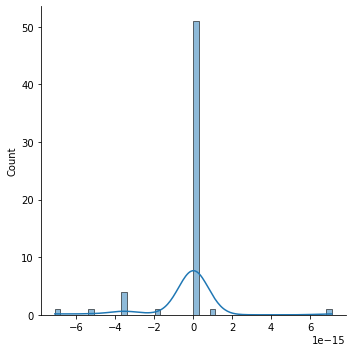

In [10]:
reg = linear_model.LinearRegression() #EDIT CHOOSING THE BEST REGRESSOR ABOVE
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

sns.displot((y_test - predictions), kde=True, bins=50)